<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have predicted the wine quality using KNN algorithm 
    I also used Decision Tree Algorithm for classification and found similar accuracy

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Wine_Quality_Data.csv')

In [5]:
data.head()
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

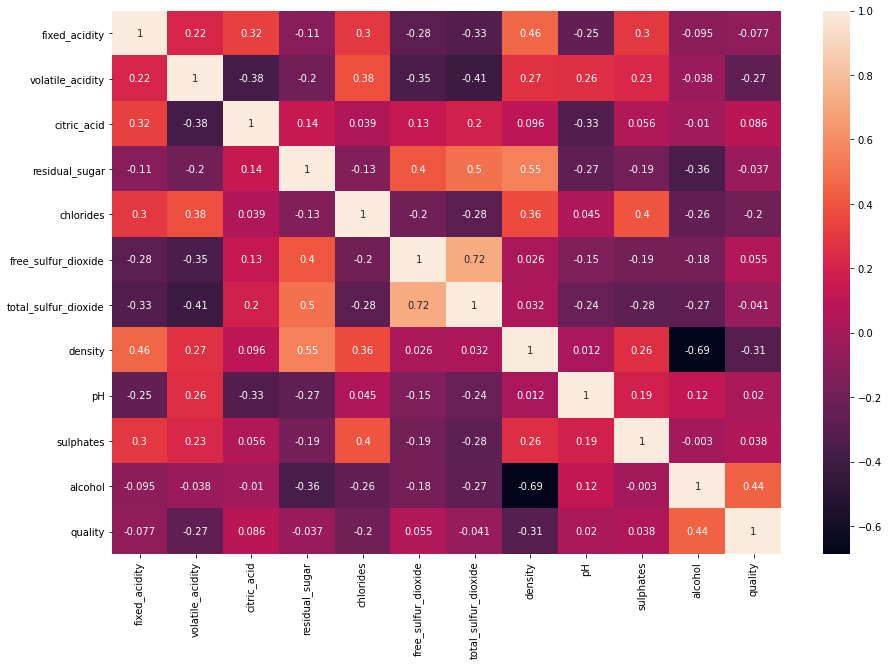

In [6]:
corr= data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [7]:
data['color'].unique()
data['color']=data['color'].map({'red':0,
                    'white':1})

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
data['goodquality'] = [1 if x>7 else 0 for x in data['quality']]

In [10]:
training = data.drop(['quality','goodquality'],axis=1)

In [11]:
test = data['goodquality']

In [12]:
model = KNeighborsClassifier()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x,x_test,y,y_test =train_test_split(training , test  ,random_state=0,test_size=0.2)

In [ ]:
model.fit(x,y)

In [16]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [18]:
accuracy = accuracy_score(y_test,y_pred)

In [19]:
accuracy

0.9692307692307692

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model2 = DecisionTreeClassifier()

In [22]:
model2.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
prediction  = model.predict(x_test)

In [24]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [26]:
features = list(data.columns[:11])

In [27]:
features.append('color')

In [28]:
features

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'color']

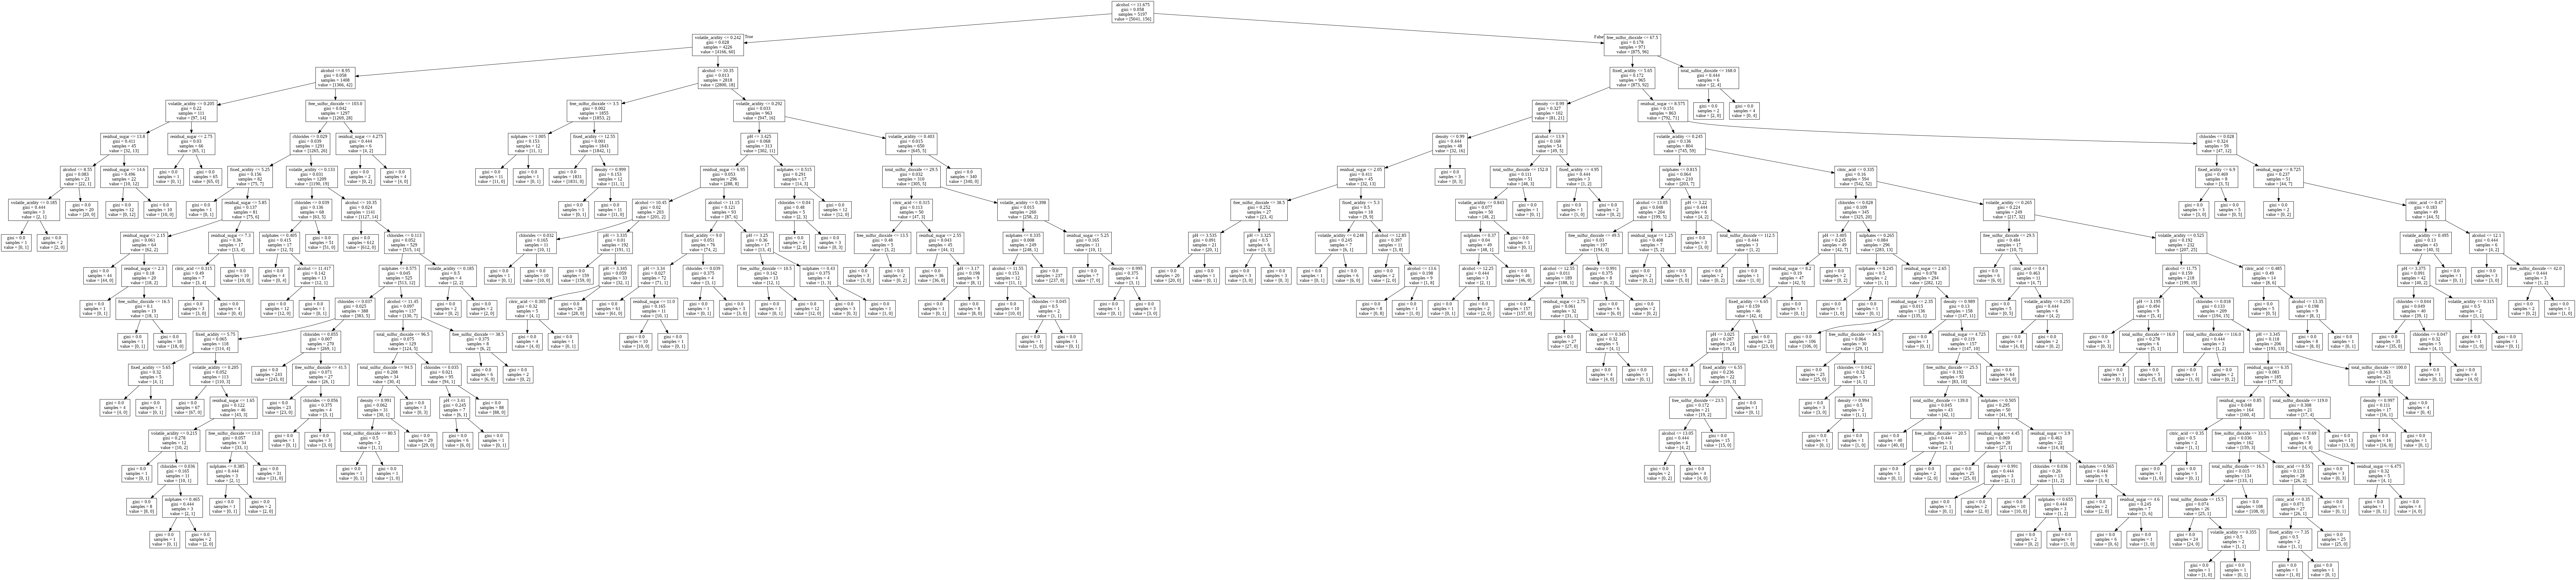

In [29]:
dot_data = StringIO()  
tree.export_graphviz(model2, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Wine_quality.png")
Image(graph.create_png())  